# Implementación de red neuronal en Keras

* **Autora:** Judith Alejandra Hinojosa Rábago
* **Materia:** Aprendizaje máquina
* **Fecha de entrega:** 16 de septiembre de 2023


## Contexto del problema

El objetivo de esta actividad es implementar una red neuronal (utilizando el API secuencial de Keras) que tendrá como objetivo estimar el peso de una persona a partir de mediciones que se tienen disponibles.



## Descripción del conjunto de datos
El conjunto de datos consiste de estimaciones del porcentaje de grasa corporal determinado por pesaje bajo el agua y varias mediciones de circunferencia corporal para 252 hombres (en total 14 características y 1 variable objetivo).

\


El conjunto de datos fue proporcionado por el Dr. A. Garth Fisher quién ha otorgado permisos para distribuirlos y utilizarlos.

Roger W. Johnson, Department of Mathematics & Computer Science, South Dakota School of Mines & Technology

501 East St. Joseph Street Rapid City, SD 57701

email: rwjohnso@silver.sdsmt.edu

### Datos de entrada


| Nombre del atributo | Papel          | Tipo de variable | Unidad | Valores faltantes | Descripción                 |
|---------------------|----------------|------------------|--------|-------------------|-----------------------------|
| `Density`      | Característica | Continua         | kg/L     | 0                 | Densidad determinada a partir del pesaje bajo el agua |
| `BodyFat`       | Característica | Continua         | %     | 0                 | Porcentaje de grasa corporal a partir de la ecuación de Siri (1956) |
| `Age`      | Característica | Discreta         | Años     | 0                 | Edad del hombre |
| `Height`       | Característica | Continua         | in     | 0                 | Altura del hombre |
| `Neck`      | Característica | Continua         | cm     | 0                 | Circunferencia del cuello |
| `Chest`       | Característica | Continua         | cm     | 0                 | Circunferencia del pecho |
| `Abdomen`      | Característica | Continua         | cm     | 0                 | Circunferencia del abdomen |
| `Hip`       | Característica | Continua         | cm     | 0                 | Circunferencia de la cadera |
| `Thigh`      | Característica | Continua         | cm     | 0                 | Circunferencia del muslo |
| `Knee`       | Característica | Continua         | cm     | 0                 | Circunferencia de la rodilla |
| `Ankle`       | Característica | Continua         | cm     | 0                 | Circunferencia del tobillo |
| `Biceps`      | Característica | Continua         | cm     | 0                 | Circunferencia del bíceps |
| `Forearm`       | Característica | Continua         | cm     | 0                 | Circunferencia del antebrazo |
| `Wrist`      | Característica | Continua         | cm     | 0                 | Circunferencia de la muñeca |


## Datos de salida

| Nombre del atributo | Papel    | Tipo de variable | Unidad | Valores faltantes | Descripción                                                                        |
|---------------------|----------|------------------|--------|-------------------|------------------------------------------------------------------------------------|
| `Weight`             | Objetivo | Continua       | lb       | 0                 | Peso de la persona |

## Importar librerías y datos

In [3]:
# Importar librerías
import pandas as pd
import numpy as np

# Graficar
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesamiento
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Modelar Red Neuronal Densamente Conectada
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import set_random_seed, plot_model

set_random_seed(42)

In [4]:
# Importar datos como dataframe
df = pd.read_csv("/content/bodyfat.csv")

In [5]:
X = df.drop(columns='Weight')
y = df['Weight']

## Análisis de datos

En un total de 15 columnas: tenemos un entero, los demás son flotantes, no hay nulos. Los valores van de acurdo con lo descrito anteriormente.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


Los datos a simple vista parecen tener medianas y medias similares

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Density,252.0,1.055574,0.019031,0.995,1.0414,1.0549,1.0704,1.1089
BodyFat,252.0,19.150794,8.368740,0.000,12.4750,19.2000,25.3000,47.5000
Age,252.0,44.884921,12.602040,22.000,35.7500,43.0000,54.0000,81.0000
Weight,252.0,178.924405,29.389160,118.500,159.0000,176.5000,197.0000,363.1500
Height,252.0,70.148810,3.662856,29.500,68.2500,70.0000,72.2500,77.7500
Neck,252.0,37.992063,2.430913,31.100,36.4000,38.0000,39.4250,51.2000
Chest,252.0,100.824206,8.430476,79.300,94.3500,99.6500,105.3750,136.2000
Abdomen,252.0,92.555952,10.783077,69.400,84.5750,90.9500,99.3250,148.1000
Hip,252.0,99.904762,7.164058,85.000,95.5000,99.3000,103.5250,147.7000
Thigh,252.0,59.405952,5.249952,47.200,56.0000,59.0000,62.3500,87.3000


### Sesgo de los datos

In [8]:
#Función para señalar sesgo
def f(x):
    if x['value'] < -1 or x['value'] > 1: return 'Altamente sesgada'
    elif (x['value']<=0 and x['value']>=-0.5) or (x['value'] >=0 and x['value']<=0.5):
        return 'Distribución simétrica'
    else: return 'Moderadamenta sesgada'

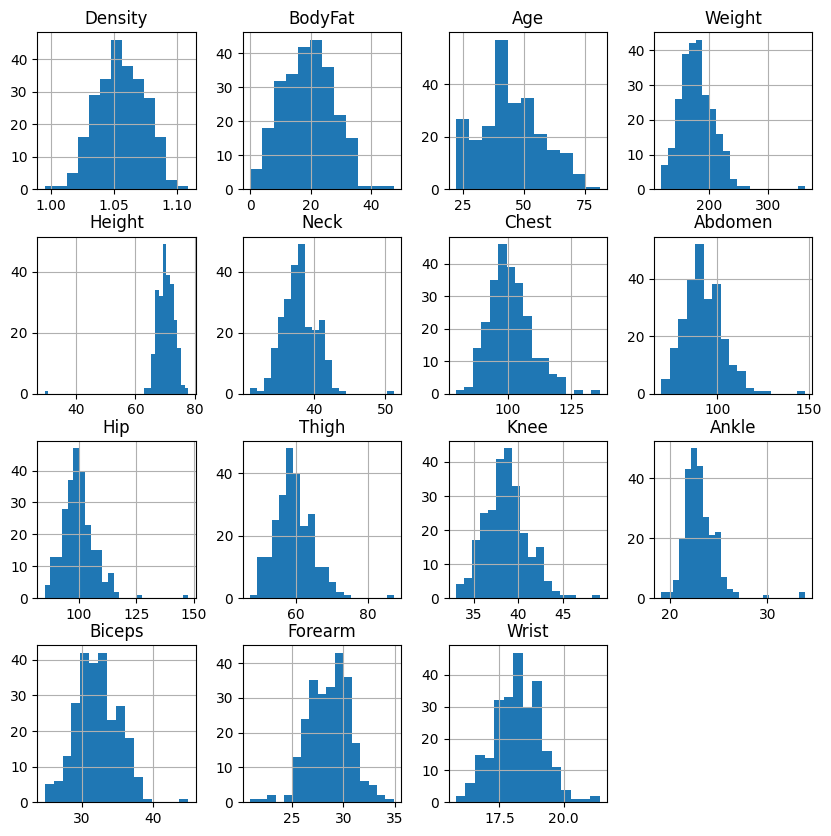

In [9]:
df.hist(bins="auto", figsize=(10,10))
plt.show()

In [10]:
# Cálculo del sesgo
skewness = round(df.select_dtypes(exclude=['object']).skew(), 2)
skewness = skewness.to_frame()
skewness = skewness.rename(columns={0: "value"})

skewness['skewness'] = skewness.apply(f, axis=1)
skewness

,value,skewness
Density,-0.02,Distribución simétrica
BodyFat,0.15,Distribución simétrica
Age,0.28,Distribución simétrica
Weight,1.21,Altamente sesgada
Height,-5.38,Altamente sesgada
Neck,0.55,Moderadamenta sesgada
Chest,0.68,Moderadamenta sesgada
Abdomen,0.84,Moderadamenta sesgada
Hip,1.50,Altamente sesgada
Thigh,0.82,Moderadamenta sesgada


### Datos atípicos

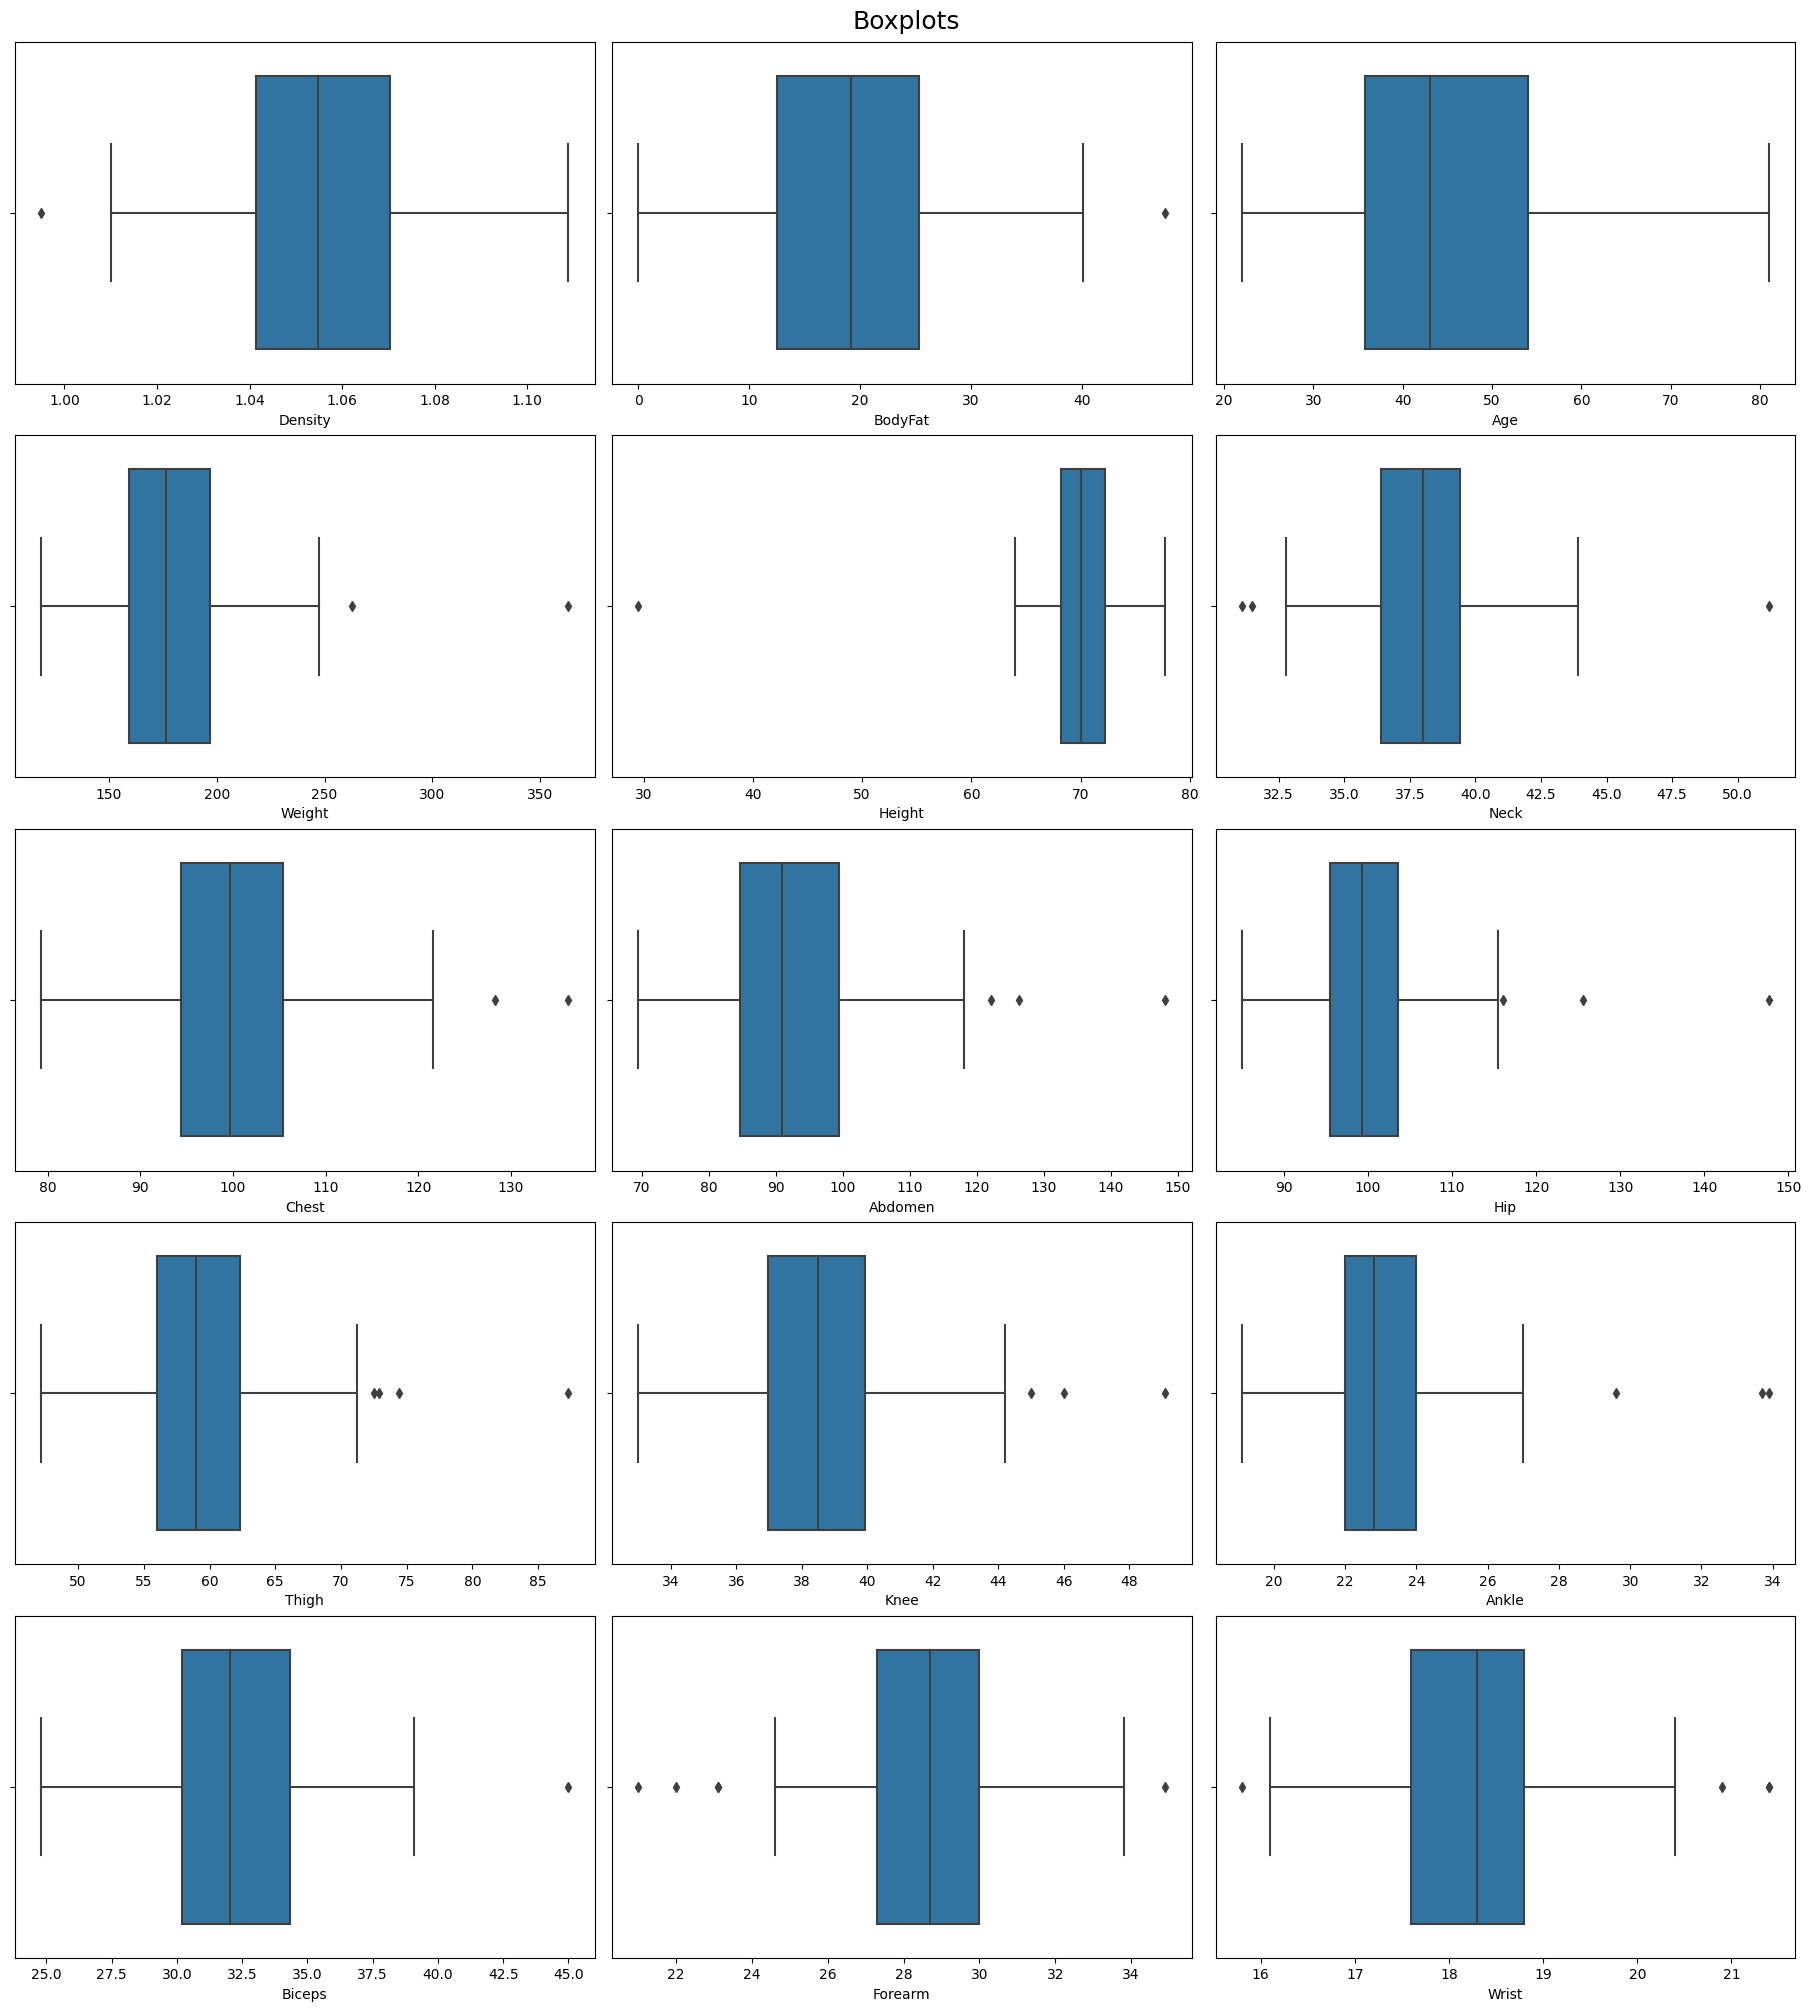

In [11]:
labels = df.columns

ncols = 3
nrows = int(np.ceil(len(labels) / 3))
figsize = (ncols * 6, nrows * 4)

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=figsize,
    constrained_layout=True)
fig.suptitle('Boxplots', fontsize=18)

id = 0

for axs in axes:
    for ax in axs:
        sns.boxplot(ax=ax, data=df, x=labels[id])

        id += 1

In [12]:
# Función para determinar outliers
def find_boundaries(df_var,distance=1.5):
    IQR = df_var.quantile(0.75)-df_var.quantile(0.25)
    lower = df_var.quantile(0.25)-IQR*distance
    upper = df_var.quantile(0.75)+IQR*distance
    return lower,upper

def find_outliers(x, var, distance = 1.5):
  lmin,lmax = find_boundaries(x[var], distance)
  outliers = np.where(x[var] > lmax, True, np.where(x[var] < lmin, True, False))
  outliers_df = x.loc[outliers, var]
  return outliers_df

In [13]:
find_outliers(df, 'Density')

215    0.995
Name: Density, dtype: float64

In [14]:
find_outliers(df, 'BodyFat')

215    47.5
Name: BodyFat, dtype: float64

In [15]:
find_outliers(df, 'Age')

Series([], Name: Age, dtype: int64)

In [16]:
find_outliers(df, 'Weight')

38    363.15
40    262.75
Name: Weight, dtype: float64

In [17]:
find_outliers(df, 'Height')

41    29.5
Name: Height, dtype: float64

In [18]:
df.iloc[41]

Density      1.025
BodyFat     32.900
Age         44.000
Weight     205.000
Height      29.500
Neck        36.600
Chest      106.000
Abdomen    104.300
Hip        115.500
Thigh       70.600
Knee        42.500
Ankle       23.700
Biceps      33.600
Forearm     28.700
Wrist       17.400
Name: 41, dtype: float64

In [19]:
df.Height.sort_values().head()

41     29.50
215    64.00
73     64.00
28     64.75
35     65.00
Name: Height, dtype: float64

***La altura de una persona es de 29.5 pulgadas.***

In [20]:
find_outliers(df, 'Neck')

38     51.2
44     31.5
105    31.1
Name: Neck, dtype: float64

In [21]:
find_outliers(df, 'Chest')

38    136.2
40    128.3
Name: Chest, dtype: float64

In [22]:
find_outliers(df, 'Abdomen')

38     148.1
40     126.2
215    122.1
Name: Abdomen, dtype: float64

In [23]:
find_outliers(df, 'Hip')

34    116.1
38    147.7
40    125.6
Name: Hip, dtype: float64

In [24]:
find_outliers(df, 'Thigh')

38     87.3
40     72.5
151    72.9
168    74.4
Name: Thigh, dtype: float64

In [25]:
find_outliers(df, 'Knee')

38     49.1
191    45.0
243    46.0
Name: Knee, dtype: float64

In [26]:
find_outliers(df, 'Ankle')

30    33.9
38    29.6
85    33.7
Name: Ankle, dtype: float64

In [27]:
df.iloc[30]

Density      1.0716
BodyFat     11.9000
Age         32.0000
Weight     182.0000
Height      73.7500
Neck        38.7000
Chest      100.5000
Abdomen     88.7000
Hip         99.8000
Thigh       57.5000
Knee        38.7000
Ankle       33.9000
Biceps      32.5000
Forearm     27.7000
Wrist       18.4000
Name: 30, dtype: float64

In [28]:
df.iloc[85]

Density      1.0386
BodyFat     26.6000
Age         67.0000
Weight     167.0000
Height      67.5000
Neck        36.5000
Chest       98.9000
Abdomen     89.7000
Hip         96.2000
Thigh       54.7000
Knee        37.8000
Ankle       33.7000
Biceps      32.4000
Forearm     27.7000
Wrist       18.2000
Name: 85, dtype: float64

In [29]:
df.iloc[38]

Density      1.0202
BodyFat     35.2000
Age         46.0000
Weight     363.1500
Height      72.2500
Neck        51.2000
Chest      136.2000
Abdomen    148.1000
Hip        147.7000
Thigh       87.3000
Knee        49.1000
Ankle       29.6000
Biceps      45.0000
Forearm     29.0000
Wrist       21.4000
Name: 38, dtype: float64

In [30]:
df.Ankle.sort_values(ascending=False).head()

30     33.9
85     33.7
38     29.6
221    27.0
40     26.6
Name: Ankle, dtype: float64

In [31]:
find_outliers(df, 'Biceps')

38    45.0
Name: Biceps, dtype: float64

In [32]:
find_outliers(df, 'Forearm')

44     23.1
158    34.9
174    21.0
205    23.1
225    22.0
Name: Forearm, dtype: float64

In [33]:
find_outliers(df, 'Wrist')

38     21.4
40     21.4
225    15.8
251    20.9
Name: Wrist, dtype: float64

El registro 38 y 40 se repiten demasiado, en todas por estar por arriba de la norma.

### Correlación de los datos

In [34]:
sns.pairplot(df)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

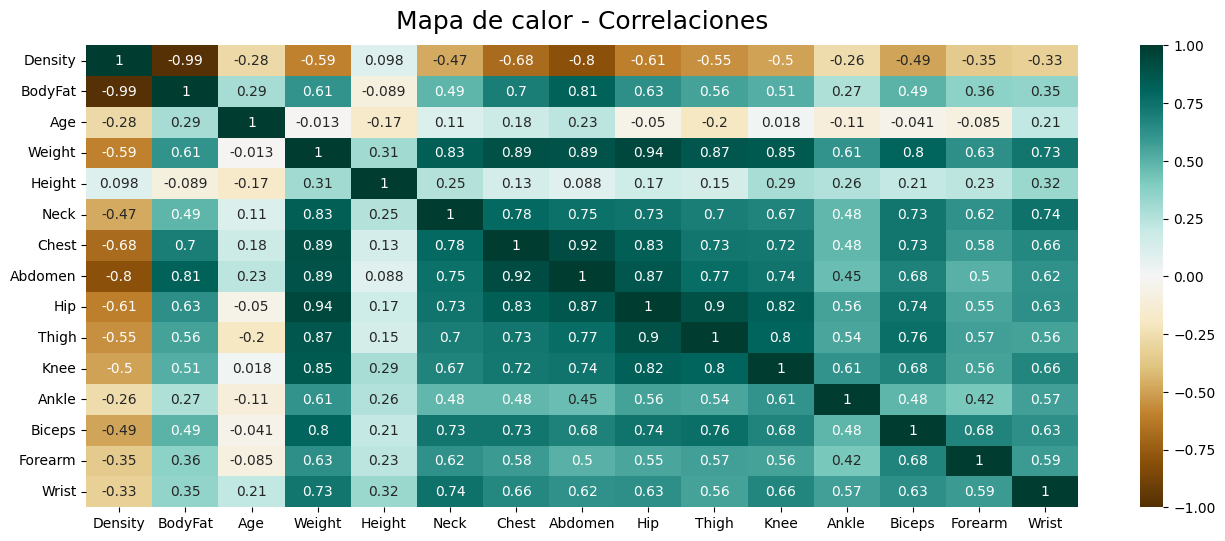

In [35]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Mapa de calor - Correlaciones', fontdict={'fontsize':18}, pad=12)
plt.show()

- Las variables `Height` y `Age` no tienen una correlación aparente con las demás variables.
- `BodyFat` y `Density` tienen una correlación negativa muy alta (de casi -1).

#### Correlación de variables predictoras

Tomemos $|x_n|>0.8$ como alta correlación.

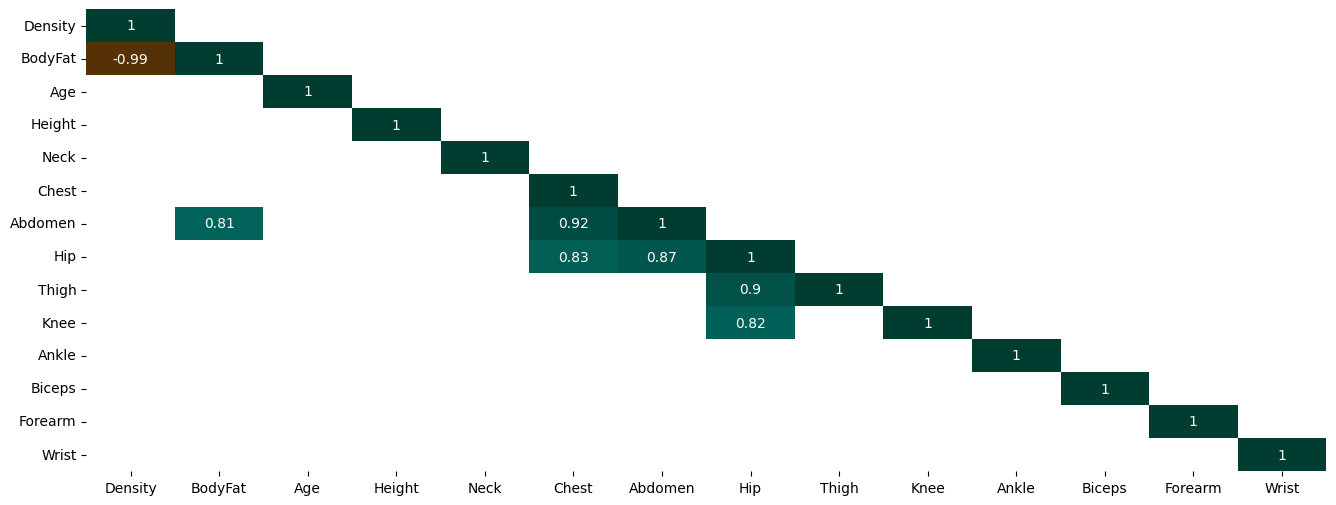

In [36]:
plt.figure(figsize=(16, 6))
mask = np.tril(np.ones_like(X.corr(), dtype=bool)) * X.corr().abs() <= 0.8
sns.heatmap(X.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', cbar=False)
plt.show()

Parece haber altas correlaciones absolutas entre:
- `BodyFat` y `Density`: -0.99
- `Abdomen` y `Chest`: 0.92
- `Hip` y `Thigh`: 0.9
- `Hip` y `Abdomen`: 0.87
- `Hip` y `Chest`: 0.83
- `Hip` y `Knee`: 0.82
- `Abdomen` y `BodyFat`: 0.81

\
*Sería importante considerarlo a la hora de seleccionar características, ya que puede haber colinealidad.*

#### Correlación de variables predictoras vs variable objetivo

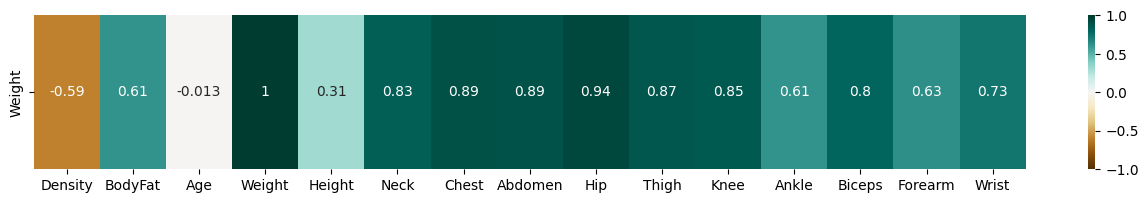

In [37]:
plt.figure(figsize=(16, 2))
sns.heatmap(
    data=df.corr()[['Weight']].T,
    vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

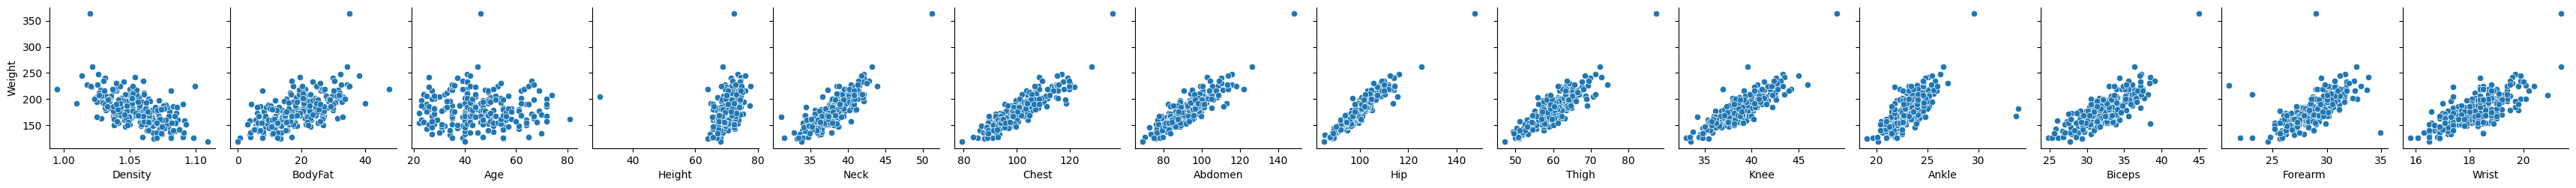

In [38]:
sns.pairplot(data=df,
                  y_vars=['Weight'],
                  x_vars=X.columns)
plt.show()

Las variables que tienen un ajuste cercano a una línea recta y una alta correlación (mayor a 0.8) con la variable objetivo son: `Neck`, `Chest`, `Abdomen`, `Hip`, `Thigh`, `Knee` y `Biceps`.

## Tratamiento de las variables

In [39]:
mask = mask.to_numpy() == False
np.fill_diagonal(mask, False)
comp_col = np.argwhere(mask)

In [40]:
comp_col

array([[1, 0],
       [6, 1],
       [6, 5],
       [7, 5],
       [7, 6],
       [8, 7],
       [9, 7]])

### Eliminar datos atípicos

Basado en las variables con los sesgos más altos se identifican 4 registros con datos atípicos, se probará eliminandolos y sin eliminar.

In [41]:
df_deleted = df[~df.index.isin([41, 30, 38, 85])]
X_deleted =  df_deleted.drop(columns='Weight')
y_deleted = df_deleted['Weight']

### Mitigar sesgo

#### Si eliminamos datos atípicos de `Ankle` y `Height`

In [42]:
# Cálculo del sesgo con valores eliminados
skewness_deleted = round(df_deleted.select_dtypes(exclude=['object']).skew(), 2)
skewness_deleted = skewness_deleted.to_frame()
skewness_deleted = skewness_deleted.rename(columns={0: "value"})

skewness_deleted['skewness'] = skewness_deleted.apply(f, axis=1)
skewness_deleted[skewness_deleted['skewness'] != 'Distribución simétrica']

,value,skewness


No necesitamos mitigar el sesgo

#### Si eliminamos dato atípico de `Height`

In [43]:
skewness[skewness['skewness'] != 'Distribución simétrica']

,value,skewness
Weight,1.21,Altamente sesgada
Height,-5.38,Altamente sesgada
Neck,0.55,Moderadamenta sesgada
Chest,0.68,Moderadamenta sesgada
Abdomen,0.84,Moderadamenta sesgada
Hip,1.50,Altamente sesgada
Thigh,0.82,Moderadamenta sesgada
Knee,0.52,Moderadamenta sesgada
Ankle,2.26,Altamente sesgada


In [44]:
df_transformed = df[~df.index.isin([41])].copy()

# Varias transformaciones
df_transformed['Weight'] = np.log(df_transformed['Weight'])
df_transformed['Neck'] = np.log(df_transformed['Neck'])
df_transformed['Chest'] = np.log(df_transformed['Chest'])
df_transformed['Abdomen'] = np.log(df_transformed['Abdomen'])
df_transformed['Hip'] = (df_transformed['Hip']) ** (-1)
df_transformed['Thigh'] = np.log(df_transformed['Thigh'])
df_transformed['Knee'] = np.log(df_transformed['Knee'])
df_transformed['Ankle'] = (df_transformed['Ankle']) ** (-2)

In [45]:
# Cálculo del sesgo con valores transformados
skewness_transformed = round(df_transformed.select_dtypes(exclude=['object']).skew(), 2)
skewness_transformed = skewness_transformed.to_frame()
skewness_transformed = skewness_transformed.rename(columns={0: "value"})

skewness_transformed['skewness'] = skewness_transformed.apply(f, axis=1)
skewness_transformed[skewness_transformed['skewness'] != 'Distribución simétrica']

,value,skewness


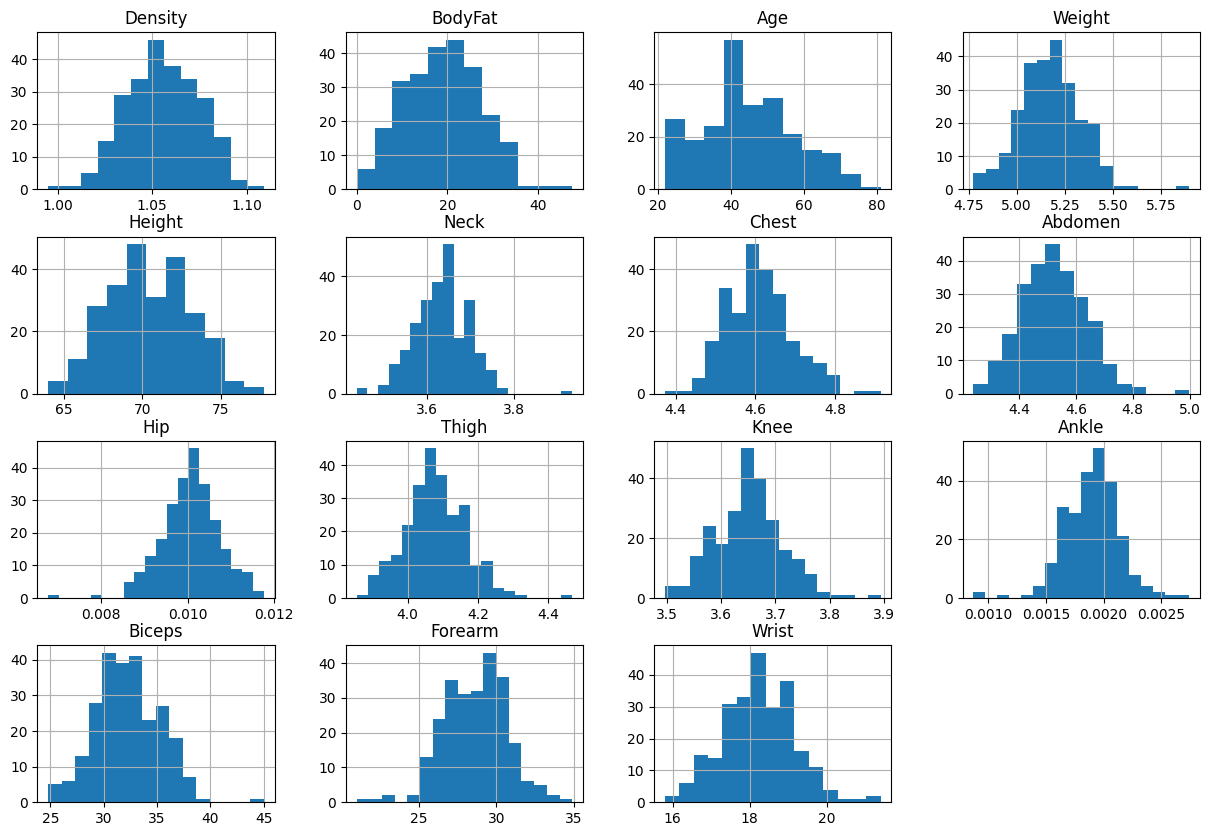

In [46]:
df_transformed.hist(bins="auto", figsize=(15,10))
plt.show()

In [47]:
X_transformed =  df_transformed.drop(columns='Weight')
y_transformed = df_transformed['Weight']

### Selección de características

In [48]:
# Definir la selección de características
fs = SelectKBest(score_func=f_regression, k=10)
# Aplicar la selección de características
fs.fit(X_deleted, y_deleted)
cols_selected_deleted = fs.get_support(indices=True)
print(cols_selected_deleted)

[ 4  5  6  7  8  9 10 11 12 13]


In [49]:
# Definir la selección de características
fs = SelectKBest(score_func=f_regression, k=10)
# Aplicar la selección de características
fs.fit(X_transformed, y_transformed)
cols_selected = fs.get_support(indices=True)
print(cols_selected)

[ 4  5  6  7  8  9 10 11 12 13]


In [50]:
df_transformed.corr()[['Weight']].T.drop(columns='Weight').iloc[:, cols_selected]

,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Weight,0.824222,0.896701,0.884367,-0.941208,0.869355,0.859505,-0.683506,0.803079,0.662951,0.74364


### Dividir los datos en train y test

`X1` y `X2` tendrán las 10 características seleccionadas.

- `X1` tiene eliminados los datos atípicos de `Ankle` y `Height`.
- `X2` tiene eliminado sólo el dato atípico de `Height`.

In [51]:
#Dividimos los datos en test y train
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X_deleted.iloc[:, cols_selected], y_deleted, test_size=0.3, random_state=42)

In [52]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X_transformed.iloc[:, cols_selected], y_transformed, test_size=0.3, random_state=42)

`X3` y `X4` tendrán 8 características, ya que se retirarán las dos con más alta correlación con alguna otra característica.

- `X3` tiene eliminados los datos atípicos de `Ankle` y `Height`.
- `X4` tiene eliminado sólo el dato atípico de `Height`.

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X_deleted.iloc[:, cols_selected].drop(columns=['Chest', 'Thigh']),
    y_deleted.drop(columns=['Chest', 'Thigh']),
    test_size=0.3, random_state=42)

In [ ]:
X4_train, X4_test, y4_train, y4_test = train_test_split(
    X_transformed.iloc[:, cols_selected].drop(columns=['Chest', 'Thigh']),
    y_transformed.drop(columns=['Chest', 'Thigh']),
    test_size=0.3, random_state=42)

### Escalar los datos conforme a los datos de entrenamiento

In [53]:
StandardScaler = preprocessing.StandardScaler
scaler = StandardScaler()

In [ ]:
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)
y1_train = scaler.fit_transform(y1_train.ravel().reshape(-1, 1))
y1_test = scaler.transform(y1_test.ravel().reshape(-1, 1))

In [ ]:
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)
y2_train = scaler.fit_transform(y2_train.ravel().reshape(-1, 1))
y2_test = scaler.transform(y2_test.ravel().reshape(-1, 1))

In [ ]:
X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.transform(X3_test)
y3_train = scaler.fit_transform(y3_train.ravel().reshape(-1, 1))
y3_test = scaler.transform(y3_test.ravel().reshape(-1, 1))

In [ ]:
X4_train = scaler.fit_transform(X4_train)
X4_test = scaler.transform(X4_test)
y4_train = scaler.fit_transform(y4_train.ravel().reshape(-1, 1))
y4_test = scaler.transform(y4_test.ravel().reshape(-1, 1))

## Modelado: Definición de una red neuronal

### Implementación

In [ ]:
evaluacion = dict()

#### Modelo 1

In [ ]:
model01 = Sequential([
    Input(shape=(X1_train.shape[1],)),
    Dense(70, name="capa-1"),
    Dense(35, activation='relu', name="capa-2"),
    Dense(1, name="capa-3")
    ])

model01.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa-1 (Dense)              (None, 70)                770       
                                                                 
 capa-2 (Dense)              (None, 35)                2485      
                                                                 
 capa-3 (Dense)              (None, 1)                 36        
                                                                 
Total params: 3291 (12.86 KB)
Trainable params: 3291 (12.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model01.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
model01.fit(X1_train, y1_train, epochs=100, batch_size=20)

Epoch 1/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2228
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 0.1023
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0892
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0807
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0743
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0702
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0649
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0631
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0600
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0577
Epoch 11/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 12/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0550
Epoch 13/100
9/9 [==============================] - 0s 4ms/st

In [ ]:
evaluacion['model01'] = model01.evaluate(X1_test, y1_test, batch_size=12)

7/7 [==============================] - 0s 2ms/step - loss: 0.0625


#### Modelo 2

In [ ]:
model02 = Sequential([
    Input(shape=(X2_train.shape[1],)),
    Dense(70, name="capa-1"),
    Dense(35, activation='relu', name="capa-2"),
    Dense(1, name="capa-3")
    ])

model02.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa-1 (Dense)              (None, 70)                770       
                                                                 
 capa-2 (Dense)              (None, 35)                2485      
                                                                 
 capa-3 (Dense)              (None, 1)                 36        
                                                                 
Total params: 3291 (12.86 KB)
Trainable params: 3291 (12.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model02.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
model02.fit(X2_train, y2_train, epochs=100, batch_size=20)

Epoch 1/100
9/9 [==============================] - 0s 3ms/step - loss: 0.4155
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0872
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0741
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0694
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0656
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0632
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0604
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0585
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0563
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0551
Epoch 11/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0532
Epoch 12/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0526
Epoch 13/100
9/9 [==============================] - 0s 3ms/st

In [ ]:
evaluacion['model02'] = model02.evaluate(X2_test, y2_test, batch_size=12)

7/7 [==============================] - 0s 3ms/step - loss: 0.0450


#### Modelo 3

In [ ]:
model03 = Sequential([
    Input(shape=(X3_train.shape[1],)),
    Dense(70, name="capa-1"),
    Dense(35, activation='relu', name="capa-2"),
    Dense(1, name="capa-3")
    ])

model02.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa-1 (Dense)              (None, 70)                770       
                                                                 
 capa-2 (Dense)              (None, 35)                2485      
                                                                 
 capa-3 (Dense)              (None, 1)                 36        
                                                                 
Total params: 3291 (12.86 KB)
Trainable params: 3291 (12.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model03.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
model03.fit(X3_train, y3_train, epochs=100, batch_size=20)

Epoch 1/100
9/9 [==============================] - 1s 3ms/step - loss: 0.5662
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 0.1336
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 0.1077
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0924
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0815
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0735
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0689
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0656
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0628
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0600
Epoch 11/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0576
Epoch 12/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0576
Epoch 13/100
9/9 [==============================] - 0s 2ms/st

In [ ]:
evaluacion['model03'] = model03.evaluate(X3_test, y3_test, batch_size=12)

7/7 [==============================] - 0s 3ms/step - loss: 0.0777


#### Modelo 4

In [ ]:
model04 = Sequential([
    Input(shape=(X4_train.shape[1],)),
    Dense(70, name="capa-1"),
    Dense(35, activation='relu', name="capa-2"),
    Dense(1, name="capa-3")
    ])

model04.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa-1 (Dense)              (None, 70)                630       
                                                                 
 capa-2 (Dense)              (None, 35)                2485      
                                                                 
 capa-3 (Dense)              (None, 1)                 36        
                                                                 
Total params: 3151 (12.31 KB)
Trainable params: 3151 (12.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model04.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
model04.fit(X4_train, y4_train, epochs=100, batch_size=5)

Epoch 1/100
35/35 [==============================] - 1s 2ms/step - loss: 0.1689
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0889
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0706
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0642
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0591
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0567
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 8/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0517
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0499
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0477
Epoch 11/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0479
Epoch 12/100
35/35 [==============================] - 0s 2ms/step - loss: 0.0464
Epoch 13/100
35/35 [=================

In [ ]:
evaluacion['model04'] = model04.evaluate(X4_test, y4_test, batch_size=12)

7/7 [==============================] - 0s 3ms/step - loss: 0.0689


### Evaluación

In [ ]:
pd.DataFrame(data=[evaluacion.values()], columns=evaluacion.keys())

,model01,model02,model03,model04
0,0.062545,0.044967,0.077717,0.068873


El modelo con el mejor performance fue el 2, donde en el preprocesamiento se transformaban los datos y eliminaba sólo el dato atípico en `Height`, además, contenía 10 características, todas se estandarizaban.

La red neuronal consta de dos capas ocultas y una capa de salida, donde la primera capa oculta tiene 70 neuronas y una función de activación identidad, la segunda una capa oculta de 35 neuronas y una función de activación *ReLu* y como capa de salida tiene una neurona con función de activación identidad.

\

| model01 | model02    | model03 | model04                                                                        |
|---------------------|----------|------------------|---------|
| 0.068636             | 0.047767 | 0.077892       | 0.063577       |

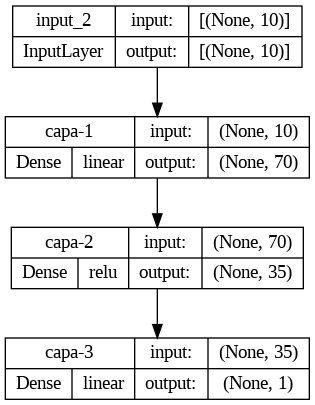

In [ ]:
plot_model(model02, show_shapes=True, show_layer_activations=True)

## Exportar el modelo y escalada de datos

In [ ]:
model = model02

In [ ]:
model.save('/content/Scaler and Model')

In [55]:
from pickle import dump

In [71]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X_transformed.iloc[:, cols_selected], y_transformed, test_size=0.3, random_state=42)

In [62]:
X2_train = scaler.fit(X2_train)
X2_test = scaler.transform(X2_test)
#y2_train = scaler.fit_transform(y2_train.ravel().reshape(-1, 1))
#y2_test = scaler.transform(y2_test.ravel().reshape(-1, 1))

In [72]:
dump(scaler.fit(X2_train), open('/content/drive/MyDrive/ITESO/23O/APRENDIZAJE MÁQUINA/M01/S09/Scaler and Model/scalerX.pkl', 'wb'))

In [63]:
X2_train

array([[ 0.24611731,  0.79309662,  0.62727247, ...,  1.43484855,
         0.84438181,  0.94882852],
       [-0.52736379, -0.35125094, -0.82246742, ..., -0.65625591,
        -0.98417078, -0.64062577],
       [ 0.78257266,  0.40516903,  0.14636466, ...,  0.40589239,
         0.44901909, -0.11080767],
       ...,
       [ 0.03494993,  0.70555378,  0.50516198, ...,  0.40589239,
         0.44901909,  0.94882852],
       [ 0.86354563,  0.91240919,  1.10720824, ...,  1.16931147,
         0.15249705,  0.8428649 ],
       [ 1.14379683,  0.36000485,  0.32764198, ..., -0.3575267 ,
         0.79496147,  1.58461024]])

In [69]:
scaler.mean_

array([3.63542262e+00, 4.60882509e+00, 4.52087281e+00, 1.00745223e-02,
       4.07598440e+00, 3.64626582e+00, 1.92526314e-03, 3.20771429e+01,
       2.86914286e+01, 1.82045714e+01])